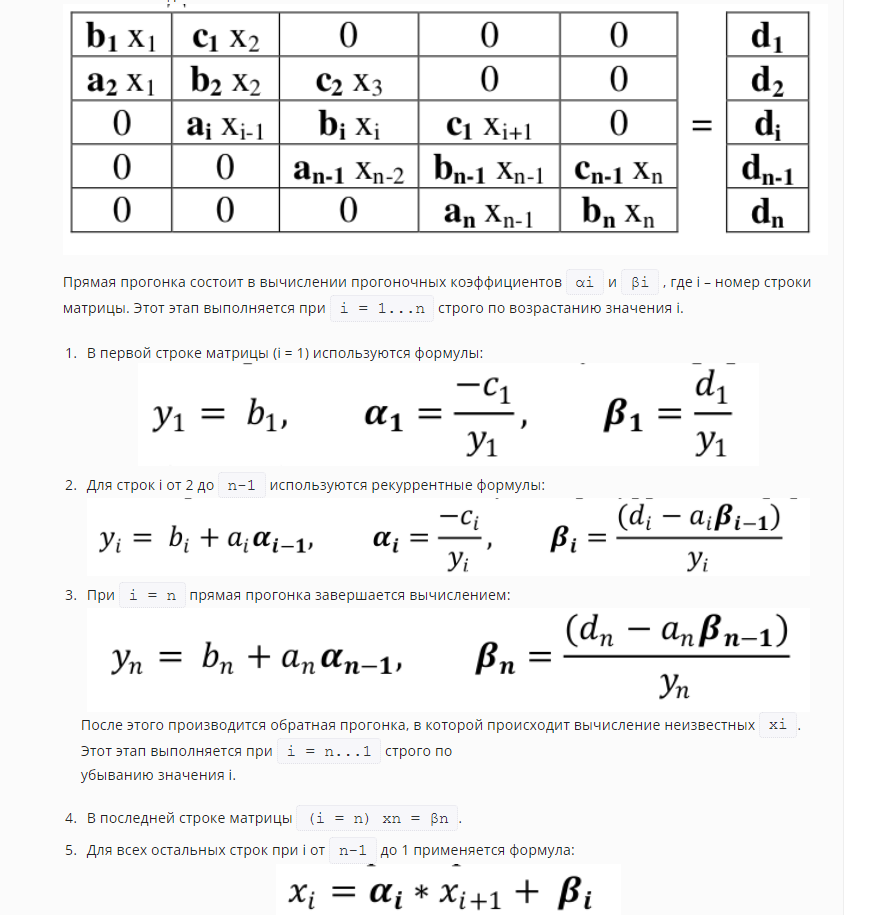

In [1]:
def  tridiagonal_matrix(arr_a, arr_b, arr_c, arr_d):
    y=[arr_b[0]]
    alfa=[-arr_c[0]/y[0]]
    betta = [arr_d[0]/y[0]]
    
    n = len(arr_a)
    for i in range(1, n-1):
        y.append(arr_b[i]+arr_a[i]*alfa[i-1])
        alfa.append(-arr_c[i]/y[i])
        betta.append((arr_d[i]-arr_a[i]*betta[i-1])/y[i])
   
    
        
    alfa.append(0)
    betta.append((arr_d[n-1]-arr_a[n-1]*betta[n-2])/(arr_b[n-1]+arr_a[n-1]*alfa[n-2]))
    #print("alfa", alfa)
    #print("betta", betta)
    
    
    x = [betta[n-1]]
    for i in range (n-2, -1, -1):
        x.append(alfa[i]*x[n-2-i]+betta[i])
    return x[:: -1]

arr_d = [2, 0.25,0.375, 39]
arr_a = [0 , -1.25,-1.16667, -16]
arr_b = [ 1, 2.5, 2.5, 41 ]
arr_c = [0, -0.75, -0.83333, 0]

print(tridiagonal_matrix(arr_a, arr_b, arr_c, arr_d))

[2.0, 1.5029516747194833, 1.3431722490649443, 1.4753842923180271]


## Задание 8.1

In [2]:
import numpy as np
u0 = 2.5
un= 5
a = 1
b = 2
n = 100
def func1(a, b,u0, un, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    arr_a = [0]
    arr_b = [1]
    arr_c = [0]
    arr_d = [u0]
    for i in range (0 , n -1):
        arr_a .append(-1)
        arr_b.append(2+0.25*h**2)
        arr_c .append(-1)
        xi = a+ i*h
        arr_d.append ((h**2)*(0.5*xi**2 - 0.5*xi-3.25))
    arr_a .append(0)
    arr_b.append(1)
    arr_c .append(0)
    arr_d.append (un)
    u = tridiagonal_matrix(arr_a, arr_b, arr_c, arr_d)
    return u
u = func1(a, b,u0, un, n)
print (u)


[2.5, 2.506373035206741, 2.5131337297393626, 2.5202817476152273, 2.5278167525347826, 2.5357384078731515, 2.544046376671717, 2.5527403216296993, 2.561819905095722, 2.571284789059373, 2.5811346351427495, 2.5913691045920046, 2.6019878582688745, 2.6129905566422007, 2.624376859779443, 2.6361464273381796, 2.6482989185575994, 2.660833992249983, 2.6737513067921728, 2.687050520117032, 2.700731289704894, 2.7147932725749984, 2.729236125276917, 2.7440595038819673, 2.7592630639746143, 2.77484646064386, 2.790809348474622, 2.8071513815390956, 2.823872213388108, 2.8409714970424544, 2.858448884984227, 2.8763040291481237, 2.8945365809127495, 2.913146191091898, 2.9321325099258235, 2.951495187072497, 2.971233871598848, 2.9913482119719883, 3.0118378560504278, 3.0327024510752683, 3.053941643661386, 3.0755550797885944, 3.0975424047927973, 3.11990326335712, 3.1426372995030265, 3.1657441565814204, 3.1892234772637282, 3.213074903532967, 3.2372980766747936, 3.2618926372685366, 3.2868582251782117, 3.3121944795435

In [4]:
def analit_func(x):
    return (-0.9874*np.exp(0.5*x)+1.85983*np.exp(-0.5*x)+2*x**2-2*x+3)
def tridiagonal_matrix_with_eps(a, b,u0, un, eps ):
    n1 = 2
    h =(b-a)/n1
    while  (np.max(np.abs(analit_func(np.linspace(a, b, n1+1))-func1(a, b,u0, un, n1)))>=eps):
        #print(np.max(np.abs(analit_func(np.linspace(a, b, n1+1))-func1(a, b,u0, un, n1))))
        n1*= 2
        h =(b-a)/n1
    return func1(a, b,u0, un, n1)

In [5]:
eps = 0.001
res = tridiagonal_matrix_with_eps(a, b,u0, un, eps )
print(res)


[2.5, 2.5024528880443713, 2.504964913253384, 2.507536055290918, 2.510166293813532, 2.5128556084703915, 2.5156039789031874, 2.518411384746061, 2.521277805625526, 2.5242032211603873, 2.527187610961668, 2.5302309546325286, 2.5333332317681907, 2.5364944219558576, 2.539714504774638, 2.542993459795469, 2.546331266581034, 2.5497279046856884, 2.5531833536553816, 2.5566975930275775, 2.5602706023311756, 2.5639023610864364, 2.5675928488048996, 2.5713420449893083, 2.57514992913353, 2.579016480722478, 2.5829416792320337, 2.586925504128968, 2.590967934870862, 2.5950689509060316, 2.5992285316734463, 2.6034466566026517, 2.607723305113691, 2.612058456617027, 2.6164520905134623, 2.620904186194062, 2.625414723040074, 2.629983680422852, 2.634611037703774, 2.639296774234167, 2.6440408693552255, 2.6488433023979336, 2.6537040526829876, 2.6586230995207147, 2.663600422210995, 2.6686360000431826, 2.673729812296027, 2.6788818382375945, 2.6840920571251874, 2.6893604482052664, 2.694686990713371, 2.7000716638740387

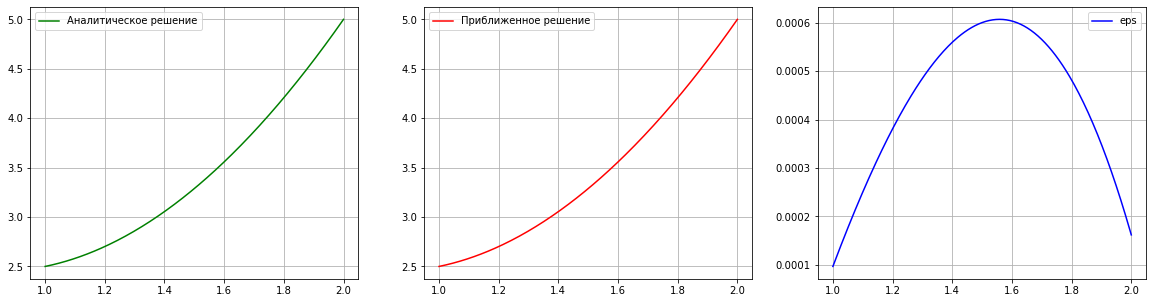

In [6]:
from matplotlib import pyplot as plt
n=257   


x=np.linspace(a, b, n)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(x, analit_func(x), label = 'Аналитическое решение', color = 'g')
axs[0].legend()
axs[0].grid()
axs[1].plot(x, res, label = 'Приближенное решение', color = 'r')
axs[1].legend()
axs[1].grid()



axs[2].plot(x,abs(analit_func(x) -res),color = 'b', label = 'eps')
axs[2].legend()
axs[2].grid()

## Задание 8.2

In [7]:
def k1(x):
    return 7-x
def k2(x):
    return 6
def k3(x):
    return 15
def k(x):
    if x >= 0 and x <= 1:
        return k1(x)
    elif x <= 2:
        return k2(x)
    elif x <= 3:
        return k3(x)
print(k(1))


N = 100
h=(b-a)/N


6
